<a href="https://colab.research.google.com/github/dineshkk15/hello-world/blob/main/Python_advance/15_Matplotlib_Scatter_Plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Matplotlib Scatter Plots

Load in data.

In [ ]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\DK\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


We'll subset this data to only Data Analysts so we have more meaningful insights.

In [ ]:
df = df[df['job_title_short'] == 'Data Analyst']

In [ ]:
df_exploded = df.explode('job_skills')

df_exploded

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,r,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,python,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,sql,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,nosql,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,power bi,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785717,Data Analyst,Data & Analytics Architect (w/m/x),"Erfurt, Jerman",melalui LinkedIn,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,NTT DATA DACH,azure,"{'cloud': ['aws', 'azure']}"
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,sas,"{'analyst_tools': ['sas', 'excel'], 'programmi..."
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,sas,"{'analyst_tools': ['sas', 'excel'], 'programmi..."
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,sql,"{'analyst_tools': ['sas', 'excel'], 'programmi..."


In [ ]:
skill_stats =df_exploded.groupby('job_skills').agg(
    skill_count=('job_skills', 'count'),
    median_salary=('salary_year_avg', 'median')
)
skill_stats = skill_stats.sort_values(by='skill_count', ascending=False).head(10)

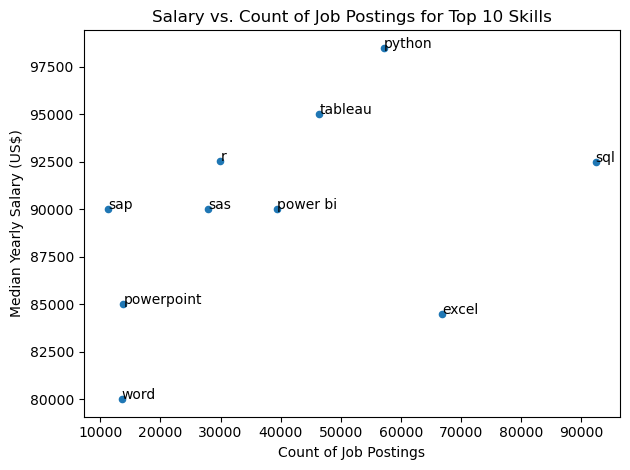

In [ ]:
skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary (US$)')
plt.title('Salary vs. Count of Job Postings for Top 10 Skills')

for i, txt in enumerate(skill_stats.index):
    plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt)
plt.tight_layout()
plt.show()

## Scatter Plot

### Notes

* `scatter()` - create a scatter plot of x vs y.
* Common parameters:
    * `x`, `y` - Column names or positions to plot, typically one column for the x-axis and another for the y-axis.
    * `s` - The size of each point. Can be a single size or an array for varying sizes.
    * `c` - Color of each marker. Can specify a single color or an array to have different colors for each point.
    * `marker` - The style of the marker. You can use markers like o, ^, *, etc.
    * `alpha` - The blending value of the markers, between 0 (transparent) and 1 (opaque).
* Syntax: `plt.scatter(df['x'], df['y'], s=df['size'], c=df['color'], alpha=0.5, marker='o')`
* Scatter plots compare different categories or groups of data.

### Example

Create a scatter plot that plots the count of job postings using `job_skills` for each skill versus their median salary using `salary_year_avg`. The count will be on the x-axis while the salary year median will be on the y-axis.

In [ ]:
# Explode the 'job_skills' into individual rows
df_exploded = df.explode('job_skills')

skill_stats = df_exploded.groupby('job_skills').agg(
    median_salary=('salary_year_avg', 'median'),
    skill_count=('job_skills', 'count')
)

# Limit to the top 10 skills by highest salary
skill_stats = skill_stats.sort_values(by='skill_count', ascending=False).head(10)

skill_stats

,median_salary,skill_count
job_skills,,
sql,92500.0,92628
excel,84500.0,67031
python,98500.0,57326
tableau,95000.0,46554
power bi,90000.0,39468
r,92527.5,30075
sas,90000.0,28068
powerpoint,85000.0,13848
word,80850.0,13591


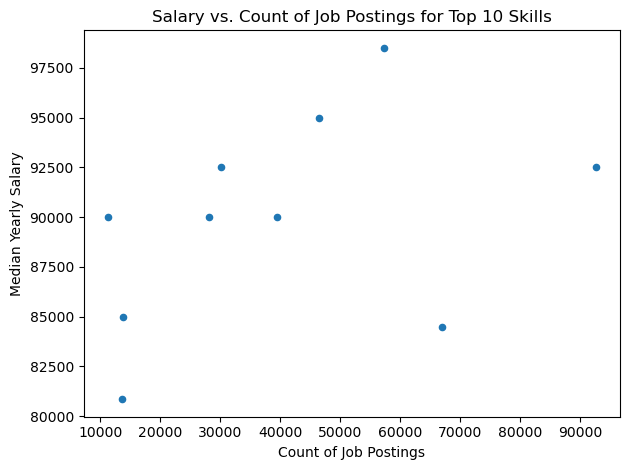

In [ ]:
skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary')
plt.title('Salary vs. Count of Job Postings for Top 10 Skills')
plt.tight_layout()
plt.show()

Now, if you notice this scatter plot isn't the most helpful because we actually **don't know** what skills are the top 10. Nothing is labeled. Don't worry we'll come back to this plot and clean it up.

### Add Annotations

#### Text
* `text`: Add text annotations to the plot.

#### Common Arguments
* `x`: The x-coordinate for the text
* `y`: The y-coordinate for the text
* `s`: The text to display
* `fontsize`: The font size of the text
* `color`: The color of the text
* `ha`: Horizontal alignment of the text
* `va`: Vertical alignment of the text

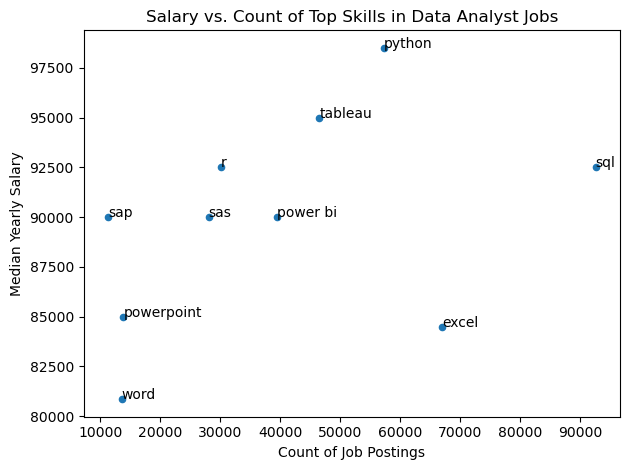

In [ ]:
skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')

# plt.text() function to label the points
for i, txt in enumerate(skill_stats.index):
    plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt)

plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary')
plt.title('Salary vs. Count of Top Skills in Data Analyst Jobs')
plt.tight_layout()
plt.show()